# Data Exploration
Mariah Bergquist, Matti Betts, Kikzely Avalos, David Aaby


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

#Cleaning the SPD dataset
SPD = pd.DataFrame(pd.read_csv("./SPD_CLEAN.csv"))
SPD.isnull().sum()
SPD = SPD.dropna(subset = ['Years of SPD Service','Officer Injured', 'Subject DOB', 'Subject Age', 'Type of Weapon', 'Disposition', 'Officer Disciplined?'])

#Cleaning the Crime dataset
Crime = pd.DataFrame(pd.read_csv("./SPD_Crime_Data__2008-Present_20241017.csv"))
Crime.isnull().sum()
Crime = Crime.dropna(subset = ['Offense Start DateTime','Offense End DateTime', 'Precinct', 'Sector', 'Beat', 'MCPP', '100 Block Address'])

#Merging them to create a new dataset
merged_df = pd.merge(Crime, SPD, on = ['Latitude', 'Longitude'])



Introduction:

For our project, we are going to examine how fatal versus non-fatal shootings affect crime rates in different areas of Seattle. Further, we would like to determine if any factors like an officer’s years of service or disposition of crime (justified or unjustified) play a role in crime rates as well.

Crime Rates - https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5/about_data

SPD Officer Shooting - https://data.seattle.gov/Public-Safety/SPD-Officer-Involved-Shooting-OIS-Data/mg5r-efcm/about_data 




Overview of data engineering efforts:

After we found our two datasets that we were going to use for our project it was obvious they needed to be cleaned up. We were facing a lot of issues with NULL values and columns of data that we were not planning on using. To start off I deleted a few rows that we didn't plan on using in our analysis like, if the officer was on duty or not. After removing all of the columns that we didn't plan on using I decided to find all the NULL values and delete those respective rows. 

I started with the SPD Office Shooting dataset first. I used a function to find all Null values and add the amount of NULL values for each column. Then I used a df.dropna() function to drop all the NULL values in each row that had NULL values. Then I created a new df called SPD that had the clean dataset in it. 

Next I moved on to the Crime Rates dataset where I repeated the same steps as before. I made sure to remove the columns that were not relevant to our analysis. I summed up all of the NULL values and used the same function to drop the rows that contained any NULL values. Then I created it to be a new dataframe called Crime.

We then had to join the datasets. We wanted to join it based on location of the crimes and shootings to see if we have any relation in location between both datasets. To do this we did a merge of both datasets on Latitude, Longitude. After everything was cleaned we started to do the exploration process. To do this, we started with different plots including a histogram, bar plots, heat maps, geospatial analysis, clustering analysis, and correlation analysis. 



Data Visualizations:

Since we decided to go in a different direction with our project, we had to find a new dataset to replace our hospital admission datasets. With that came the need of new visualizations to reflect the new variables.


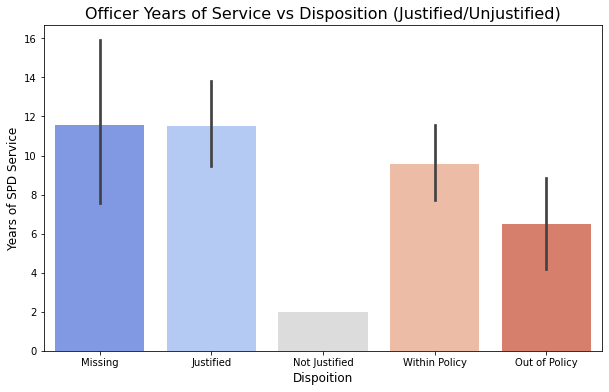

In [4]:
#Bar plot - Officer Years vs Disposition 
SPD['Years of SPD Service'] = pd.to_numeric(SPD['Years of SPD Service'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.barplot(data= SPD,x='Disposition', y='Years of SPD Service', palette = 'coolwarm')
plt.title('Officer Years of Service vs Disposition (Justified/Unjustified)', fontsize =16)
plt.xlabel('Dispoition', fontsize=12)
plt.ylabel('Years of SPD Service', fontsize = 12)
plt.show()

The bar plot is comparing years of services to different disposition categories such as justified, not justified, and missing. Officers involved in incidents classified as Justified have the highest average years of service at around 11 years. From this, we can suggest that officers with more experience tend to have a justified disposition from incidents where the officer fired a gun at the subject. Incidents marked as Not Justified had the lowest years of service at 2 years. This leads us to think that officers with less than 3 years of experience tend to be more involved in incidents where their firing a gun is seen as unjustified. As for Within Policy and Out of Policy, these dispositions had 9 and 6 years of service, respectively. There seems to be a middle ground for police officers with less than 10 years in service. 

In [7]:
#Descriptive Statistics 
#Categorical
merged_df.describe(include = 'object')

,Report Number,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,...,Subject Gender,Subject Race,Subject DOB,Subject Age,Subject Weapon,Type of Weapon,Fatal,Disposition,Officer Disciplined?,Summary
count,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
unique,6,6,6,6,2,2,5,5,5,3,...,1,2,4,4,1,4,2,1,1,3
top,2022-921175,04/20/2023 04:00:00 PM,04/25/2023 08:00:00 PM,09/29/2022 06:33:40 AM,A,PROPERTY,LARCENY-THEFT,All Other Larceny,23H,E,...,Male,White,3/8/1988,18,Yes,Colt Revolver,Yes,Justified,No,"On April 25th, 2006, at approximately 8:20 P.M..."
freq,2,2,2,2,9,9,4,4,4,6,...,11,7,6,6,11,6,6,11,11,6


In [8]:
#Numerical
merged_df.describe()

,Offense ID,Longitude,Latitude
count,1.100000e+01,11.000000,11.000000
mean,3.447742e+10,-122.328849,47.616766
std,1.366141e+10,0.022665,0.024539
min,1.280086e+10,-122.397053,47.595833
25%,2.792925e+10,-122.323764,47.595833
50%,3.408110e+10,-122.320873,47.619908
75%,4.399453e+10,-122.320873,47.619908
max,5.365112e+10,-122.320873,47.681649


In our previous assignment, we did not include descriptive statistics but in this assignment we merged our new datasets to provide an overview. The first table summarizes the categorical variables such as offense date/time, precinct, and officer details. The count for each attribute appear to be 11 indicating complete data entries. What we've noticed so far with these statistics is that certain variables do not have enough variety like Crime Against Category and Precinct. We need to find a way to add more information to our dataset so we do not run into issues regarding a lack of data. This can lead to our project not being in-depth enough. 

The second table presents numerical data like officer years of service and geographical coordiabntes. The average year of SPD service is 5.82 years with a maximum service time of 12. The geographical coordinates provide a overview of where the incidents occurred across different areas in Seattle. However, similar to the previous table expanding our dataset can give us a more varied analysis. 

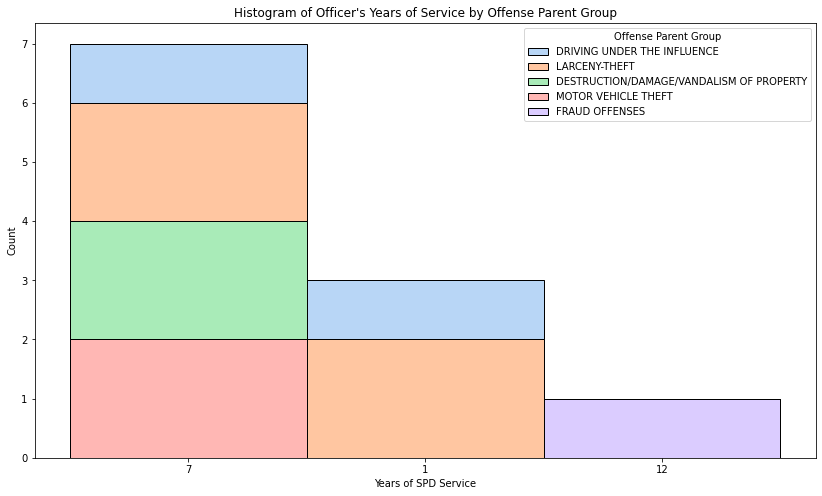

In [9]:
#Histogram
plt.figure(figsize=(14, 8))
sns.histplot(data=merged_df, x='Years of SPD Service', hue='Offense Parent Group', multiple='stack' ,palette = 'pastel')
plt.title("Histogram of Officer's Years of Service by Offense Parent Group")
plt.show()

We took a look at comparing years of service against offense parent group categories using a histogram. We saw that officers with about 6 years of service were the largest group and they were involved in a wide variety of crimes such as larceny, vandalism, and vehicle theft. The officers with fewer than 3 years were a small group that was mostly involved in driving under the influence and theft cases. Officers with about 10 years of service were associated with fraud offenses suggesting that experienced police officers deal with more complex cases.  


Techniques:

Geospatial

Geospatial analysis is important to our project because it will help visualize the distribution of fatal and non-fatal across different areas of Seattle. We can use the latitude and longitude data from both datasets to begin our analysis. Furthermore, using information about the precinct and sector will further support our analysis. Using geospatial analysis over other methods will help us detect clusters of incidents and if relationships to specific precinct boundaries exist. From here, we will be able to pin point if certain areas with more frequent shootings have higher crime rates. Mapping these variables will also aid in evaluating whether officer-related factors affect high-crime areas. 


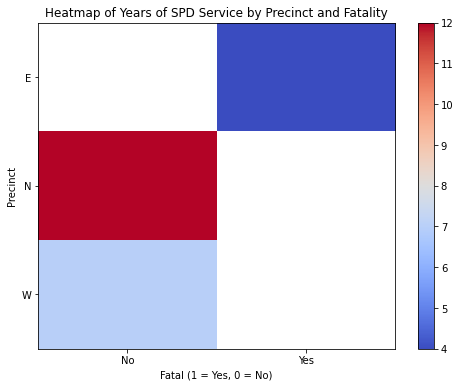

In [12]:
merged_df['Years of SPD Service'] = pd.to_numeric(merged_df['Years of SPD Service'], errors='coerce')
heatmap = pd.pivot_table(merged_df, values='Years of SPD Service', index='Precinct', columns='Fatal')
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Heatmap of Years of SPD Service by Precinct and Fatality')
plt.xlabel('Fatal (1 = Yes, 0 = No)')
plt.ylabel('Precinct')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.show()

Correlation Analysis

Using correlation analysis to explore and examine relationships between various factors related to shooting and crime rates will give us an in-depth analysis. We chose correlation over other methods to help discover underlying relationships. We will be taking a look at the correlation between officer factors like years of service and will determine if these factors drive up crime rates. 

By performing correlation analysis, we will be able to determine if experienced officers are more likely to be involved in shootings or if certain types of incidents are the most frequent type of crime in a specific high-crime area. This will give us more information on crime patterns in Seattle. 

Results

- Correlation matrix for numerical data in SPD Officer Shootings Data: Years of spd service, number of rounds fired, and subject age. The resulting matrix showed that there are no linear correlations between these numerical variables. 

- Further correlation analysis to uncover categorical patterns showed that there is not enough statistical evidence to support that there are differences in officer experience across the different Subject_Race categories.


                      Years of SPD Service  Subject Age
Years of SPD Service               1.00000      0.05524
Subject Age                        0.05524      1.00000


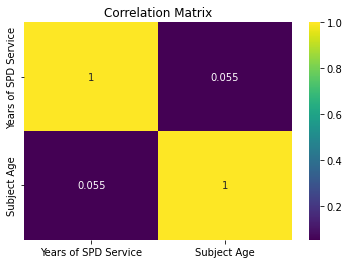

                      sum_sq     df       F    PR(>F)
C(Subject_Race)   363.455925    5.0  1.3725  0.240245
Residual         5772.926684  109.0     NaN       NaN


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm


df = pd.read_csv('SPD.csv')
df['Disciplined'] = df['Officer Injured'].apply(lambda x: 'Unknown' if x == 'No' else 'Yes')  # Assuming injured officer implies being disciplined
# Remove null values & non numeric values in numeric columns
numeric_columns = ['Years of SPD Service', 'Subject Age']
for column in numeric_columns:
   try:
       df[column] = pd.to_numeric(df[column], errors='coerce')
   except Exception as e:
       print(f"Error converting column '{column}': {e}")
corr_df = SPD.dropna(subset=numeric_columns)
correlation_matrix = SPD[numeric_columns].corr()
print(correlation_matrix.to_string())
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

# Categorical patterns
df = SPD
#print(df.columns)
# Rename columns to remove spaces
new_column_names = {'Subject Race': 'Subject_Race',
                   'Years of SPD Service': 'Officer_Experience'}
rename_df = df.rename(columns=new_column_names)
# Subject race & Officer years of service
rename_df['Subject_Race'] = pd.Categorical(rename_df['Subject_Race'])
model = smf.ols('Officer_Experience ~ C(Subject_Race)', data=rename_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


Clustering

We chose clustering as our third technique because we can group similar neighborhoods based on variables like the shooting type, officer factors and other crime characteristics. We will be able to see similarities in our datasets that we can’t see at first glance which is why we decided to go with clustering over other methods. 
If we group neighborhoods based on shooting rates, we can compare patterns of areas with different shooting outcomes. This can determine whether neighborhoods with more frequent fatal shootings have certain patterns such as officers involved have more experience or shootings end up as justified. 


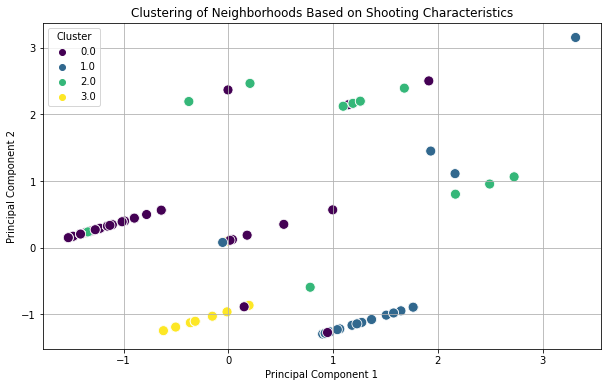

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


spd_data = pd.read_csv('SPD.csv')


# relevant features for clustering
features = ['Subject Age', 'Fatal', 'Disposition', 'Officer Gender']


# Drop rows with missing values
cluster_data = spd_data[features].dropna()


# Convert categorical data into numeric (Yes to 1, No to 0)
cluster_data['Fatal'] = cluster_data['Fatal'].apply(lambda x: 1 if x == 'Yes' else 0)
cluster_data['Officer Gender'] = cluster_data['Officer Gender'].apply(lambda x: 1 if x == 'Male' else 0)
cluster_data['Disposition'] = cluster_data['Disposition'].apply(lambda x: 1 if x == 'Justified' else 0)


# Convert 'Subject Age' to numeric
cluster_data['Subject Age'] = pd.to_numeric(cluster_data['Subject Age'], errors='coerce')
cluster_data = cluster_data.dropna()


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4)  #4 clusters
kmeans.fit(scaled_data)
cluster_data['Cluster'] = kmeans.labels_


# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)  # 2D visualization
pca_components = pca.fit_transform(scaled_data)


# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_data['Cluster']


# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Neighborhoods Based on Shooting Characteristics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



This graph represents the clustering of neighborhoods based on shooting characteristics using K-Means clustering and visualized through PCA. Four distinct clusters (0, 1, 2, 3) are shown, each represented by a different color, grouping neighborhoods with similar features such as subject age, shooting fatality, officer gender, and shooting disposition. PCA reduces the dataset's dimensions to two principal components, making it easier to visualize the clustering while retaining the most important variance. This visualization aims to reveal patterns in the data, such as which neighborhoods or incidents share common characteristics, enabling a better understanding of factors influencing shooting outcomes. This graph helps identify how variables like officer gender, subject age, or fatality rates may group similar incidents, offering insights for targeted interventions or crime prevention strategies.


Conclusion:

The descriptive statistics showed us that we need more data in our merged dataset for a bigger variety. Given that our merged dataset has limited observations it is obvious that any analysis will not be accurate enough. To fix this we will need to merge our datasets on coordinate zones instead of matched longitude latitude. This could allow us to get more data that relates to each other so we can interpret the relationships better and more accurately. Our correlation analyssi will help us with comparing the relationships between shootings and crime rates. It is interesting to see from this assignment that the heat maps are a good way to show the heat zones where crime and shootings are the highest in King County. This will be crucial for our shiney web app because it can help us show where in the county crime rates and shootings are the highest most correlated. 